# Landscape of protein sequence embeddings
Code to create an UMAP plot, based on all concatenated embeddings.  
Warning: intensive code, takes quite some CPU power and lots of RAM (although the low_memory option improves things).  
Too memory-intensive for base Colab, so I ran this on my home desktop, which took almost an hour on a (pretty old) AMD FX-6300.

### Prepare working environment

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import umap

In [4]:
# Define the paths to the info and zip file
file_path = 'embeddings.txt'

In [5]:
# Read in the info file
data = pd.read_csv(file_path, sep = '\t')

In [6]:
data.head()

,gene,residue,label,0,1,2,3,4,5,6,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,A1A5C7,M,0,0.012716,0.093859,0.084688,0.011205,-0.181056,0.052205,-0.184320,...,-0.082278,0.143322,-0.134033,-0.095482,0.007795,-0.054262,-0.034542,0.146489,-0.008180,0.102517
1,A1A5C7,A,0,-0.064453,-0.073982,-0.029324,-0.078299,-0.013324,-0.030862,-0.153081,...,-0.027993,-0.001796,-0.005711,0.079908,0.260087,0.101691,-0.136104,0.173340,0.007714,-0.059607
2,A1A5C7,I,0,-0.116070,0.017426,0.046591,0.084903,0.033102,0.013356,-0.075262,...,-0.042458,-0.049146,-0.037853,-0.063519,-0.000087,-0.018507,-0.050628,0.016588,-0.075057,0.056210
3,A1A5C7,D,0,0.037692,0.027002,0.079164,-0.030946,-0.003093,0.117487,0.027294,...,-0.094535,0.012329,-0.021995,-0.005523,0.045538,0.000723,0.042847,-0.022800,-0.047477,0.014504
4,A1A5C7,R,0,-0.072656,-0.032763,0.041782,0.110625,0.002364,0.101297,-0.078431,...,-0.043560,-0.019859,0.033039,-0.025046,0.187709,-0.066170,-0.042344,0.063745,-0.038576,-0.020000


### Fit and transform the data into 2D space

In [8]:
reducer = umap.UMAP(low_memory=True)

embedding = reducer.fit_transform(data.loc[:, '0':])
embedding.shape

(372315, 2)

### Plot the resulting clusters

In [63]:
# Color experimenting
# (0.92,0.69,0.5,0.05)
# (0.3,0.13,0.38,1)

# (0.56,0.76,0.56,0.01)
# (0.17,0.19,0.44,1)

# Set RGB color maps
col_glyco = [x/255 for x in [217,217,217]] # Dark blue
col_nonglyco = [x/255 for x in [166,189,219]] # Light blue
col_other = [x/255 for x in [68, 114, 196]] # Light grey

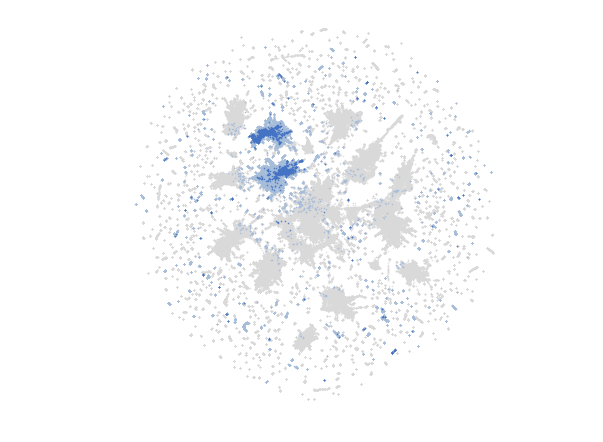

In [81]:
# Initialise figure size
plt.figure(figsize = (10, 7.5))
# Plot non-relevant residue background
plt.scatter(embedding[:, 0],
            embedding[:, 1],
            c=col_other+[0.8],
            s=0.25)
# Overlay with all serines/threonines
plt.scatter(embedding[:, 0][((data['residue'] == 'S') | (data['residue'] == 'T'))],
            embedding[:, 1][((data['residue'] == 'S') | (data['residue'] == 'T'))],
            c=col_nonglyco+[1],
            s = 0.25)
# Overlay that with all glycosylated serines/threonines
plt.scatter(embedding[:, 0][data['label'] == 1],
            embedding[:, 1][data['label'] == 1],
            c=col_glyco+[1],
            s = 0.25)
# Adjust plot params
plt.axis('off')
plt.gca().set_aspect('equal', 'datalim')
# Save and show figure
plt.savefig('Embedding_UMAP.png', bbox_inches = 'tight', dpi = 300)
plt.show()